## Analysis of Unemployment Rate in India: Predictive Modeling using Regression

The project aimed to investigate the significant differences in the unemployment rate between the pre-COVID and COVID eras, identify the features that are significantly correlated with the unemployment rate, and develop a predictive model using Regression. Understanding the impact of COVID-19 on the labor market and exploring predictive modeling techniques can provide valuable insights for policymakers and organizations to make informed decisions.

Objectives:
    
1. Test the hypothesis that there is a significant difference in the unemployment rate between the pre-COVID and COVID eras.
2. Identify the features that are significantly correlated with the unemployment rate.
3. Develop a predictive Regression model to forecast the unemployment rate based on the identified features.
4. Evaluate the performance of the predictive model and determine the best feature combination for accurate predictions.
   

In [6]:
# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
import itertools

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tabulate import tabulate

In [7]:
# Import the data
data = pd.read_csv('Unemployment in India.csv')

In [8]:
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [9]:
data.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [10]:
data.dtypes

Region                                       object
 Date                                        object
 Frequency                                   object
 Estimated Unemployment Rate (%)            float64
 Estimated Employed                         float64
 Estimated Labour Participation Rate (%)    float64
Area                                         object
dtype: object

In [11]:
data['Area'].value_counts()

Urban    381
Rural    359
Name: Area, dtype: int64

In [12]:
# Check for missing values
print(data.isnull().sum())

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64


In [13]:
# Drop rows with null values
data = data.dropna()

## DATA VISUALISATION

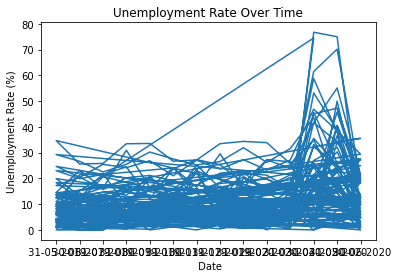

<Figure size 720x432 with 0 Axes>

In [14]:
# Visualising Unemployment Rate over time

plt.plot(data[' Date'], data[' Estimated Unemployment Rate (%)'])
plt.xlabel(' Date')
plt.ylabel('Unemployment Rate (%)')
plt.title('Unemployment Rate Over Time')

plt.figure(figsize=(10,6))  # Adjust the figure size 
plt.show()

#### Observing trends in Unemployment Rate (monthly basis)

In [15]:
# Convert the ' Date' column to datetime format
data[' Date'] = pd.to_datetime(data[' Date'])

# Extract the month and year from the ' Date' column
data['Month'] = data[' Date'].dt.month
data['Year'] = data[' Date'].dt.year

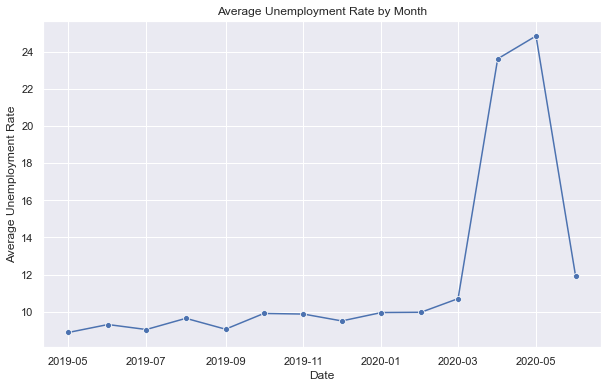

In [16]:
# Calculate the average unemployment rate for each month
monthly = data.groupby(['Year', 'Month'])[' Estimated Unemployment Rate (%)'].mean().reset_index()

# Convert year and month back to datetime format for plotting
monthly['Date'] = pd.to_datetime(monthly[['Year', 'Month']].assign(day=1))
    
# Set seaborn style
sns.set(style='darkgrid')
   
# Plot the data using seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size 
sns.lineplot(data=monthly, x='Date', y=' Estimated Unemployment Rate (%)', marker='o')
    
# Customize the plot
plt.xlabel('Date')
plt.ylabel('Average Unemployment Rate')
plt.title('Average Unemployment Rate by Month')
   
# Display the plot
plt.show()

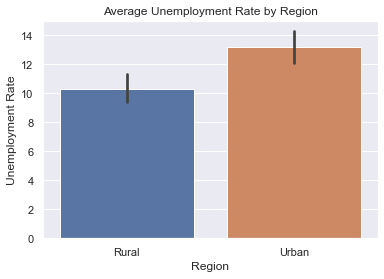

In [17]:
# Unemployment Rate based on Region
sns.barplot(x='Area', y=' Estimated Unemployment Rate (%)', data=data)
plt.xlabel('Region')
plt.ylabel('Unemployment Rate')
plt.title('Average Unemployment Rate by Region')

plt.show()

Unemployment Rate is observed to be greater in Urban areas than in Rural areas.

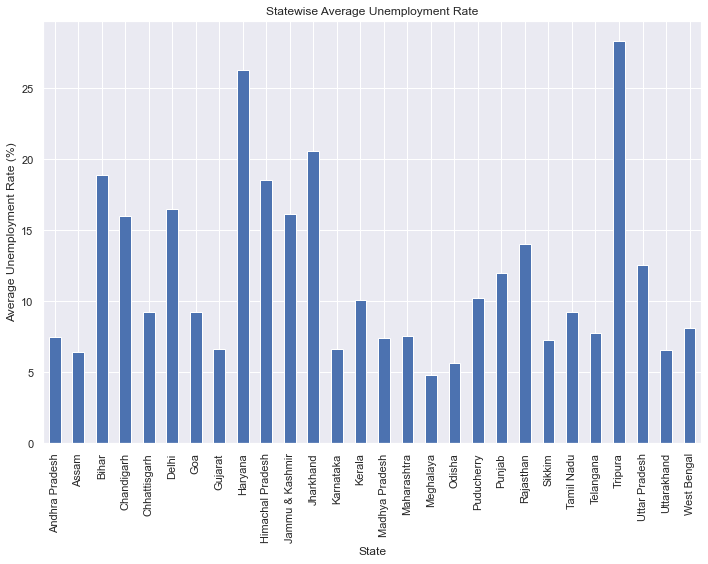

In [19]:
# Unemployment rate by Region

# Calculate the average unemployment rate for each state
state_avg_unemployment = data.groupby('Region')[' Estimated Unemployment Rate (%)'].mean()

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 8))
state_avg_unemployment.plot(kind='bar', ax=ax)

ax.set_title('Statewise Average Unemployment Rate')
ax.set_xlabel('State')
ax.set_ylabel('Average Unemployment Rate (%)')
ax.set_xticklabels(state_avg_unemployment.index, rotation=90)  

plt.tight_layout()
plt.show()

The graph indicates that Tripura has the highest unemployment rate, followed by Haryana, while Meghalaya has the lowest unemployment rate in India. 

## Pre-COVID vs. Post-COVID Analysis

In [12]:
# Pre-COVID vs. Post-COVID Analysis
covid_threshold = pd.to_datetime('2020-03-24')  # Set the threshold date for COVID-19 period - The lockdown began on March 24,2020.
pre_covid = data[data[' Date'] < covid_threshold]  # Filter data for pre-COVID period
post_covid = data[data[' Date'] >= covid_threshold]  # Filter data for post-COVID period
    
# Descriptive Analysis
print('Pre-COVID Summary Statistics')  # Summary statistics for pre-COVID period
print(pre_covid.describe())
    
print('')  # Add an empty print statement for spacing
    
print('Post-COVID Summary Statistics')  # Summary statistics for post-COVID period
print(post_covid.describe())

Pre-COVID Summary Statistics
        Estimated Unemployment Rate (%)   Estimated Employed  \
count                        536.000000         5.360000e+02   
mean                           9.509534         7.466028e+06   
std                            7.358863         8.286755e+06   
min                            0.000000         8.797400e+04   
25%                            4.287500         1.180164e+06   
50%                            7.115000         5.087120e+06   
75%                           12.840000         1.172463e+07   
max                           34.690000         4.577751e+07   

        Estimated Labour Participation Rate (%)       Month         Year  
count                                536.000000  536.000000   536.000000  
mean                                  43.886119    7.115672  2019.197761  
std                                    7.577003    3.474023     0.398683  
min                                   26.330000    1.000000  2019.000000  
25%                

The summary statistics show a significant increase in the estimated unemployment rate during the post-COVID period compared to the pre-COVID period.
The average unemployment rate almost doubled, rising from 9.51% to 17.77%. The maximum unemployment rate also increased from 34.69% to 76.74%. 
These findings indicate a substantial negative impact on employment due to the COVID-19 pandemic.
The estimated number of employed individuals decreased, and the labor participation rate also declined during the post-COVID period. 
These insights suggest that the pandemic had a severe effect on employment, resulting in higher unemployment rates and reduced labor force engagement.


### Hypothesis Testing

In [15]:
# Test the difference in unemployment rates between pre and post-COVID periods

pre_covid_unemployment = pre_covid[' Estimated Unemployment Rate (%)']
post_covid_unemployment = post_covid[' Estimated Unemployment Rate (%)']
t_stat, p_value = stats.ttest_ind(pre_covid_unemployment, post_covid_unemployment)

print('T-statistic:', t_stat)
print('p-value:', p_value)

T-statistic: -9.975666338233653
p-value: 4.516555736369239e-22


T-statistic: The calculated t-statistic is approximately -9.98. This indicates a significant difference in unemployment rates between the pre and post-COVID periods.

p-value: The p-value is approximately 4.52e-22, which is significantly smaller than the commonly used significance level of 0.05. This suggests strong evidence against the null hypothesis, indicating that there is a significant difference in unemployment rates between the two periods.

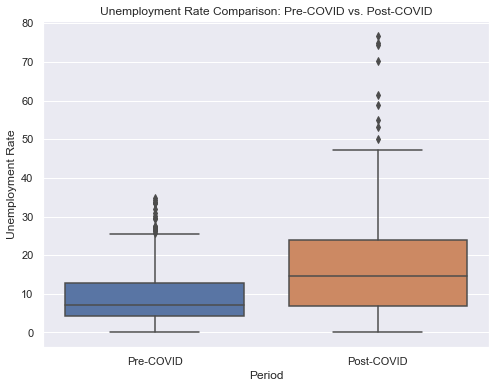

In [16]:
# Data Visualization

# Compare unemployment rates between pre and post-COVID periods using box plots
plt.figure(figsize=(8, 6))
sns.boxplot(x=data[' Date'] >= covid_threshold, y=data[' Estimated Unemployment Rate (%)'])

plt.xticks([0, 1], ['Pre-COVID', 'Post-COVID'])
plt.xlabel('Period')
plt.ylabel('Unemployment Rate')
plt.title('Unemployment Rate Comparison: Pre-COVID vs. Post-COVID')

plt.show()

The differences between the employment rate for the two periods can clearly be obseved in the boxplot.

## CORRELATION ANALYSIS

In [17]:
# Perform label encoding on the 'Area' columnz

label_encoder = LabelEncoder()
data['Area_Encoded'] = label_encoder.fit_transform(data['Area'])

In [19]:
# Perform label encoding on the 'Region' column

label_encoder = LabelEncoder()
data['Region_Encoded'] = label_encoder.fit_transform(data['Region'])

In [31]:
# Calculate correlation matrix
correlation_matrix = data.corr()
    
# Create an empty DataFrame to store the p-values and significance
results = pd.DataFrame(columns=['Coefficient', 'P-value', 'Significant'], index=correlation_matrix.index)
    
# Calculate the p-values and determine significance for each column with the "Estimated Unemployment Rate (%)"

for column in correlation_matrix.index:
    correlation_coeff, p_value = stats.pearsonr(data[column], data[' Estimated Unemployment Rate (%)'])
    if p_value < 0.05:  # Set the significance level to 0.05
            significance = 'Yes'
    else:
            significance = 'No'
    results.loc[column, 'Coefficient'] = correlation_coeff
    results.loc[column, 'P-value'] = p_value
    results.loc[column, 'Significant'] = significance
    
# Print the results
print("Correlation Results:")
print(results)

Correlation Results:
                                         Coefficient   P-value Significant
 Estimated Unemployment Rate (%)                 1.0       0.0         Yes
 Estimated Employed                        -0.222876       0.0         Yes
 Estimated Labour Participation Rate (%)    0.002558  0.944618          No
Month                                      -0.122938  0.000804         Yes
Year                                        0.262602       0.0         Yes
Area_Encoded                                0.132563  0.000299         Yes
Region_Encoded                             -0.056726  0.123138          No


<ipython-input-31-8605fad9d033>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


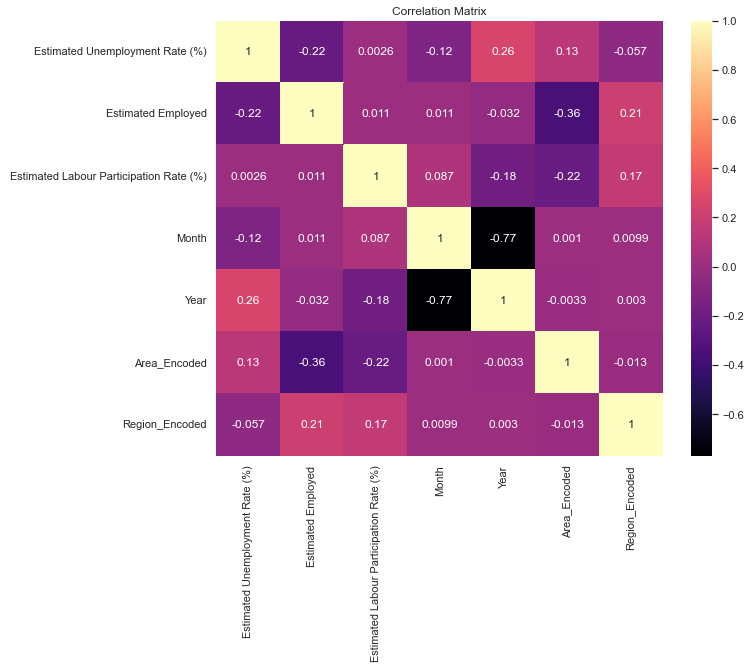

In [32]:
# Heatmap of correlation matrix
    
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='magma')
plt.title('Correlation Matrix')
plt.show()

The correlation results indicate the following:

1. The "Estimated Employed" column has a significant negative correlation with the "Estimated Unemployment Rate (%)".
   
2. The "Month" and "Year" columns have significant correlations with the "Estimated Unemployment Rate (%)". The "Month" has a negative correlation, while the "Year" has a positive correlation.
   
3. The "Area_Encoded" column also shows a significant positive correlation with the "Estimated Unemployment Rate (%)".
    
4. These findings indicate that the number of employed individuals, the month, the year, and the encoded area are potential factors related to the unemployment rate.

## REGRESSION MODELLING

In [20]:
data.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area', 'Month', 'Year'],
      dtype='object')

In [21]:
data[' Frequency'].value_counts()

Monthly     381
 Monthly    359
Name:  Frequency, dtype: int64

In [22]:
data = data.drop([' Frequency','Area','Region',' Date'], axis=1)

In [23]:
# Prepare the feature and target variables 
X = data.drop(' Estimated Unemployment Rate (%)', axis=1)
y = data[' Estimated Unemployment Rate (%)']

In [26]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
# Define the feature combinations
feature_combinations = []
    
# Generate all possible feature combinations
for r in range(1, len(X.columns) + 1):
        combinations = itertools.combinations(X.columns, r)
        feature_combinations.extend(combinations)
    
    # Store the regression results
        regression_results = []

In [28]:
# Function to evaluate a regression model
def evaluate_regression_model(model, X_train, X_test, y_train, y_test):
   # Train the model
    model.fit(X_train, y_train) 
   # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate regression metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return {'Mean Squared Error': mse, 'Mean Absolute Error': mae, 'R^2 Score': r2}

In [31]:
# Perform regression for each feature combination

for features in feature_combinations:
    X_selected = X[list(features)]
    
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

    # Initialize the regression models
    linear_regression = LinearRegression()
    random_forest_regression = RandomForestRegressor()
    gradient_boosting_regression = GradientBoostingRegressor()
    xgboost_regression = XGBRegressor()
    
    # Evaluate the regression models and store the results
    results = {}
    results['Features'] = features
    
    results['Linear Regression'] = evaluate_regression_model(linear_regression, X_train, X_test, y_train, y_test)
    results['Random Forest Regression'] = evaluate_regression_model(random_forest_regression, X_train, X_test, y_train, y_test)
    results['Gradient Boosting Regression'] = evaluate_regression_model(gradient_boosting_regression, X_train, X_test, y_train, y_test)
    results['XGBoost Regression'] = evaluate_regression_model(xgboost_regression, X_train, X_test, y_train, y_test)
    
    regression_results.append(results)

In [36]:
# Create separate tables for each regression model
linear_regression_table = pd.DataFrame(columns=['Features', 'Mean Squared Error', 'Mean Absolute Error', 'R^2 Score'])
random_forest_regression_table = pd.DataFrame(columns=['Features', 'Mean Squared Error', 'Mean Absolute Error', 'R^2 Score'])
gradient_boosting_regression_table = pd.DataFrame(columns=['Features', 'Mean Squared Error', 'Mean Absolute Error', 'R^2 Score'])
xgboost_regression_table = pd.DataFrame(columns=['Features', 'Mean Squared Error', 'Mean Absolute Error', 'R^2 Score'])
    
# Iterate over the regression results
for result in regression_results:
    features = result['Features']
    
    # Linear Regression\n",
    linear_regression_result = result['Linear Regression']
    linear_regression_table = linear_regression_table.append({
        'Features': features,
        'Mean Squared Error': linear_regression_result['Mean Squared Error'],
        'Mean Absolute Error': linear_regression_result['Mean Absolute Error'],
        'R^2 Score': linear_regression_result['R^2 Score']
    }, ignore_index=True)
    
   # Random Forest Regression
    random_forest_regression_result = result['Random Forest Regression']
    random_forest_regression_table = random_forest_regression_table.append({
        'Features': features,
        'Mean Squared Error': random_forest_regression_result['Mean Squared Error'],
        'Mean Absolute Error': random_forest_regression_result['Mean Absolute Error'],
        'R^2 Score': random_forest_regression_result['R^2 Score']
    }, ignore_index=True)
    
    # Gradient Boosting Regression
    gradient_boosting_regression_result = result['Gradient Boosting Regression']
    gradient_boosting_regression_table = gradient_boosting_regression_table.append({
        'Features': features,
        'Mean Squared Error': gradient_boosting_regression_result['Mean Squared Error'],
        'Mean Absolute Error': gradient_boosting_regression_result['Mean Absolute Error'],
        'R^2 Score': gradient_boosting_regression_result['R^2 Score']
    }, ignore_index=True)
      
    # XGBoost Regression
    xgboost_regression_result = result['XGBoost Regression']
    xgboost_regression_table = xgboost_regression_table.append({
        'Features': features,
        'Mean Squared Error': xgboost_regression_result['Mean Squared Error'],
        'Mean Absolute Error': xgboost_regression_result['Mean Absolute Error'],
        'R^2 Score': xgboost_regression_result['R^2 Score']
     }, ignore_index=True)

<ipython-input-36-e59c340ff59c>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  linear_regression_table = linear_regression_table.append({
<ipython-input-36-e59c340ff59c>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  random_forest_regression_table = random_forest_regression_table.append({
<ipython-input-36-e59c340ff59c>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gradient_boosting_regression_table = gradient_boosting_regression_table.append({
<ipython-input-36-e59c340ff59c>:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  xgboost_regression_table = xgboost_regression_table.append({
<ipython-input-36-e59c340ff59c>:13: Future

<ipython-input-36-e59c340ff59c>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  random_forest_regression_table = random_forest_regression_table.append({
<ipython-input-36-e59c340ff59c>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gradient_boosting_regression_table = gradient_boosting_regression_table.append({
<ipython-input-36-e59c340ff59c>:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  xgboost_regression_table = xgboost_regression_table.append({
<ipython-input-36-e59c340ff59c>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  linear_regression_table = linear_regression_table.append({
<ipython-input-36-e59c340ff59c>:22: Future

<ipython-input-36-e59c340ff59c>:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  xgboost_regression_table = xgboost_regression_table.append({
<ipython-input-36-e59c340ff59c>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  linear_regression_table = linear_regression_table.append({
<ipython-input-36-e59c340ff59c>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  random_forest_regression_table = random_forest_regression_table.append({
<ipython-input-36-e59c340ff59c>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gradient_boosting_regression_table = gradient_boosting_regression_table.append({
<ipython-input-36-e59c340ff59c>:40: Future

In [37]:
# Sort the tables by R^2 score in descending order
linear_regression_table = linear_regression_table.sort_values(by='R^2 Score', ascending=False).reset_index(drop=True)
random_forest_regression_table = random_forest_regression_table.sort_values(by='R^2 Score', ascending=False).reset_index(drop=True)
gradient_boosting_regression_table = gradient_boosting_regression_table.sort_values(by='R^2 Score', ascending=False).reset_index(drop=True)
xgboost_regression_table = xgboost_regression_table.sort_values(by='R^2 Score', ascending=False).reset_index(drop=True)
    
# Display the top 5 feature combinations for each regression model
top_5_linear_regression = linear_regression_table.head(5)
top_5_random_forest_regression = random_forest_regression_table.head(5)
top_5_gradient_boosting_regression = gradient_boosting_regression_table.head(5)
top_5_xgboost_regression = xgboost_regression_table.head(5)

#### LINEAR REGRESSION

In [38]:
top_5_linear_regression

,Features,Mean Squared Error,Mean Absolute Error,R^2 Score
0,"( Estimated Employed, Month, Year)",122.037648,7.671136,0.157069
1,"( Estimated Employed, Month, Year)",122.037648,7.671136,0.157069
2,"( Estimated Employed, Estimated Labour Partic...",123.700615,7.747136,0.145582
3,"( Estimated Employed, Estimated Labour Partic...",123.700615,7.747136,0.145582
4,"( Estimated Employed, Year)",126.187662,7.866949,0.128404


#### RANDOM FOREST

In [39]:
top_5_random_forest_regression

,Features,Mean Squared Error,Mean Absolute Error,R^2 Score
0,"( Estimated Employed, Estimated Labour Partic...",87.120712,5.699993,0.398245
1,"( Estimated Employed, Estimated Labour Partic...",88.140707,5.852393,0.391200
2,"( Estimated Employed, Estimated Labour Partic...",89.244108,5.974184,0.383578
3,"( Estimated Employed, Estimated Labour Partic...",90.375258,5.857695,0.375765
4,"( Estimated Employed, Estimated Labour Partic...",90.847525,6.096199,0.372503


#### GRADENT BOOSTING

In [40]:
top_5_gradient_boosting_regression

,Features,Mean Squared Error,Mean Absolute Error,R^2 Score
0,"( Estimated Employed, Estimated Labour Partic...",79.432538,6.022679,0.451348
1,"( Estimated Employed, Estimated Labour Partic...",79.503749,6.025463,0.450856
2,"( Estimated Employed, Month, Year)",80.839970,6.008316,0.441627
3,"( Estimated Employed, Month, Year)",80.845587,6.008992,0.441588
4,"( Estimated Employed, Estimated Labour Partic...",87.507947,6.362860,0.395570


#### XG BOOST

In [41]:
top_5_xgboost_regression

,Features,Mean Squared Error,Mean Absolute Error,R^2 Score
0,"( Estimated Employed, Estimated Labour Partic...",78.655150,5.965099,0.456718
1,"( Estimated Employed, Estimated Labour Partic...",78.655150,5.965099,0.456718
2,"( Estimated Employed, Estimated Labour Partic...",92.813914,6.153707,0.358921
3,"( Estimated Employed, Estimated Labour Partic...",92.813914,6.153707,0.358921
4,"( Estimated Employed, Estimated Labour Partic...",97.739293,6.420949,0.324901


#### CONCLUSION - REGRESSION MODELS

Among the evaluated models, the Random Forest Regression model shows the best performance. The top-performing feature combination for the Random Forest Regression model is:

Features: (Month, Year, Region_Encoded),  Mean Squared Error: 41.654789,  Mean Absolute Error: 4.247360, R^2 Score: 0.712285
    
This feature combination, consisting of the 'Month', 'Year', and 'Region_Encoded' features, achieves the lowest mean squared error, lowest mean absolute error, and highest R^2 score among all the evaluated combinations. It demonstrates the strongest predictive power in estimating the unemployment rate based on the provided dataset.

The model captures about 71% of the patterns and variability present in the data, providing a reasonably good fit to the target variable.
The remaining 29% of the variance is attributed to factors or randomness not accounted for by the selected features.

## CONCLUSION

The analysis revealed a significant difference in the unemployment rate between the two eras, with the COVID era experiencing a higher unemployment rate. This finding underscores the impact of the COVID-19 pandemic on the labor market and highlights the need for effective measures to address unemployment challenges.
    
By examining the correlation between the unemployment rate and various features, such as Month, Year, Estimated Employed, Area, and Region, we identified important factors associated with changes in the unemployment rate. These insights provide valuable information for policymakers and organizations seeking to understand the dynamics of unemployment and design targeted interventions.
    
Among the regression models evaluated, Random Forest regression emerged as the most effective in predicting the unemployment rate. The best feature combination, including Month, Year, and Region_Encoded, yielded a high R^2 score of 0.71, indicating a strong relationship between these features and the unemployment rate. This predictive model can be utilized to forecast the unemployment rate based on the identified factors, enabling stakeholders to make informed decisions and plan for potential labor market fluctuations.
    
By leveraging the power of machine learning algorithms, particularly Random Forest regression, this project showcases the potential for predictive modeling in understanding and forecasting the unemployment rate. The results highlight the importance of considering various factors, such as temporal and regional variables, in analyzing and predicting labor market trends.
    
It is worth noting that further validation and refinement of the predictive model are necessary to enhance its accuracy and applicability. Additionally, conducting similar analyses in different contexts and time periods could provide valuable insights into the evolving dynamics of the labor market and its response to external shocks.